# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [2]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      1
])

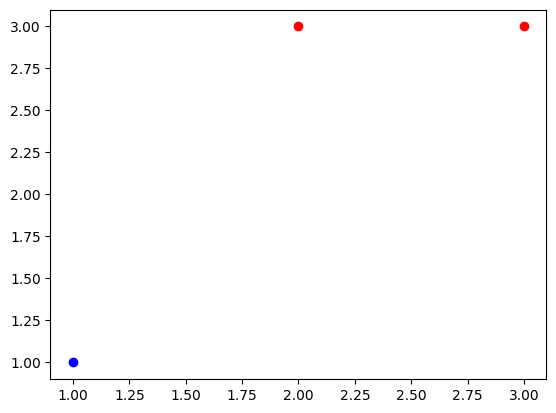

<Figure size 640x480 with 0 Axes>

In [3]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

# Linear Model

In [4]:
import projetannuel

In [5]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo = "gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 1.0


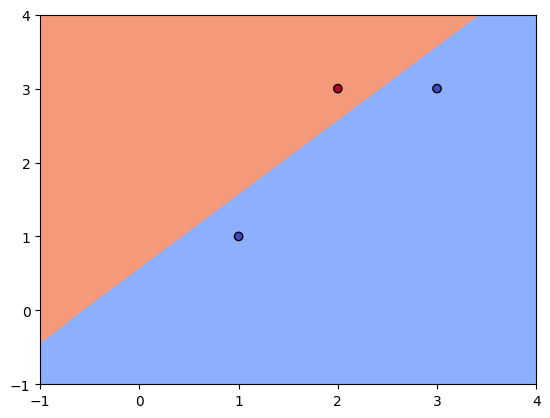

<Figure size 640x480 with 0 Axes>

In [6]:
xx, yy = np.meshgrid(np.linspace(-1, 4, 300), np.linspace(-1, 4, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()

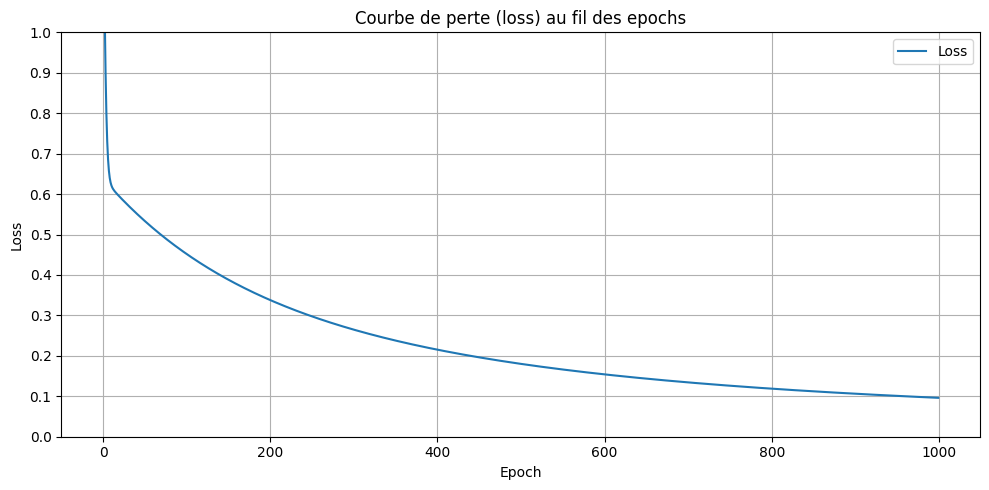

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# MLP

In [8]:
import projetannuel as pa

Y = Y.reshape(-1, 1)

model = pa.MLP([2,1])
model.train(X,Y,1000000,0.01,True)

Y_pred = [model.predict(x,True) for x in X]

Y = [list(y) for y in Y]     
print(f"Accuracy score : {pa.accuracy_score(Y, Y_pred)}")

Accuracy score : 1.0


In [9]:
print(Y_pred)

[[0.9902003868218163], [-0.9877077163650132], [0.9901128547940159]]


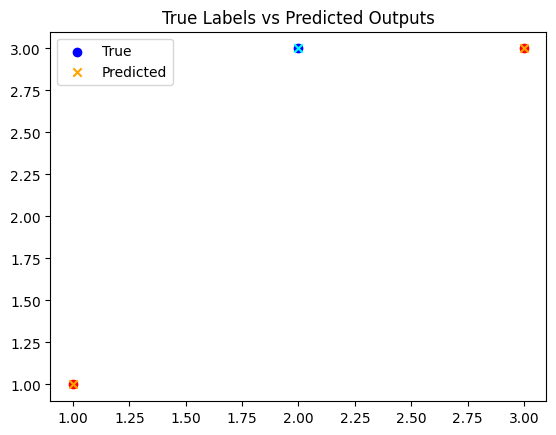

In [10]:
# Plot: Ground Truth
for i, y in enumerate(Y):
    plt.scatter(X[i, 0], X[i, 1], color='blue' if y[0] == -1 else 'red', marker='o', label='True' if i == 1 else "")

# Plot: Predictions
for i, y in enumerate(Y_pred):
    plt.scatter(X[i, 0], X[i, 1], color='cyan' if y[0] < 0 else 'orange', marker='x', label='Predicted' if i == 0 else "")

plt.legend()
plt.title("True Labels vs Predicted Outputs")
plt.show()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [11]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

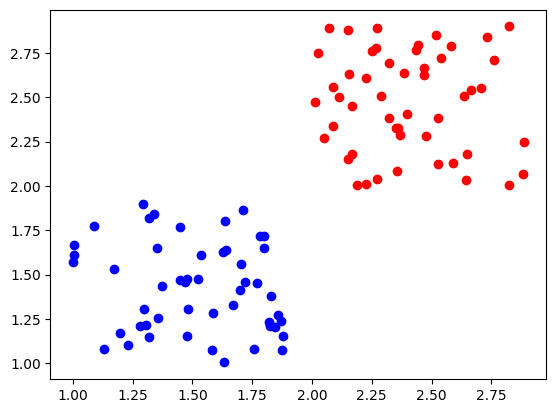

<Figure size 640x480 with 0 Axes>

In [12]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

# Linear Model

In [13]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 1.0


C:\Users\leopo\AppData\Local\Temp\ipykernel_41620\1830126744.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = projetannuel.float_labels(Y)
C:\Users\leopo\AppData\Local\Temp\ipykernel_41620\1830126744.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")


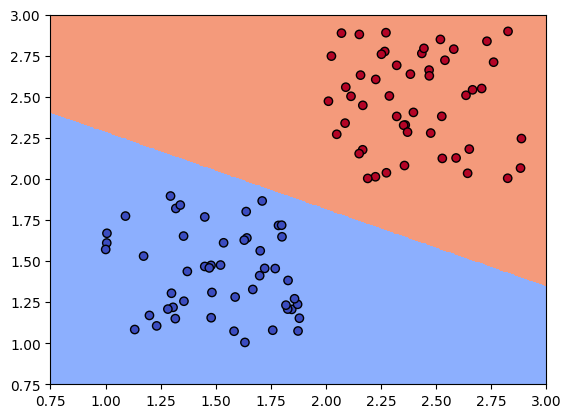

<Figure size 640x480 with 0 Axes>

In [14]:
xx, yy = np.meshgrid(np.linspace(0.75, 3, 300), np.linspace(0.75, 3, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()

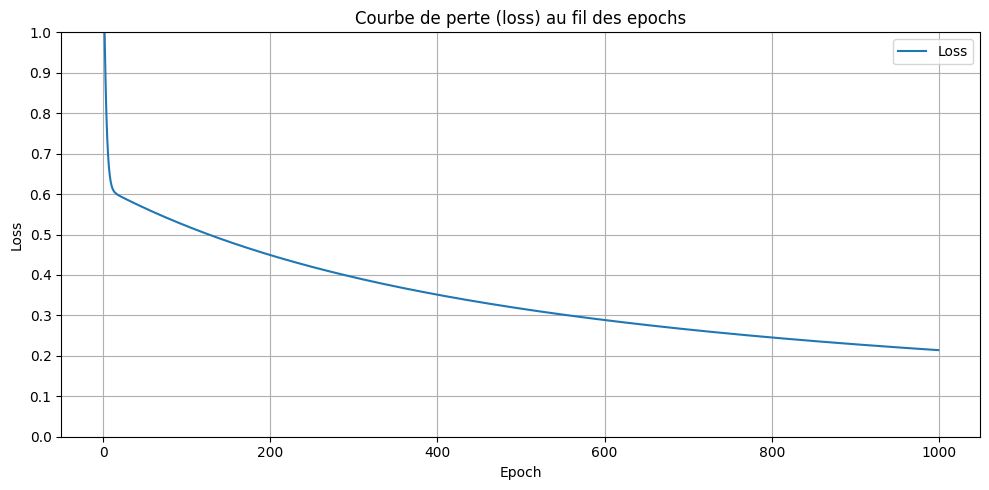

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# MLP

In [16]:
model = pa.MLP([2,1])
model.train(X,Y.reshape(-1,1),1000,0.1,True)
Y_pred = [model.predict(x,True)[0] for x in X]

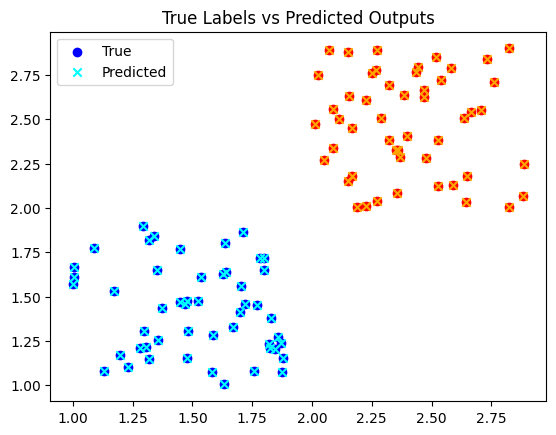

In [17]:
# Plot: Ground Truth
for i, y in enumerate(Y):
    plt.scatter(X[i, 0], X[i, 1], color='blue' if y == 1 else 'red', marker='o', label='True' if i == 0 else "")

# Plot: Predictions
for i, y in enumerate(Y_pred):
    plt.scatter(X[i, 0], X[i, 1], color='cyan' if y > 0 else 'orange', marker='x', label='Predicted' if i == 0 else "")

plt.legend()
plt.title("True Labels vs Predicted Outputs")
plt.show()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [18]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

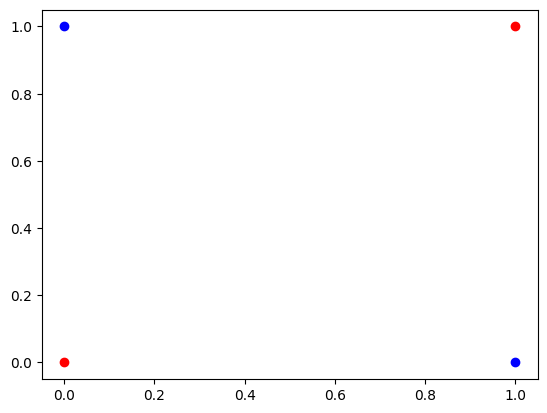

<Figure size 640x480 with 0 Axes>

In [19]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

# Linear Model

In [20]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 0.75


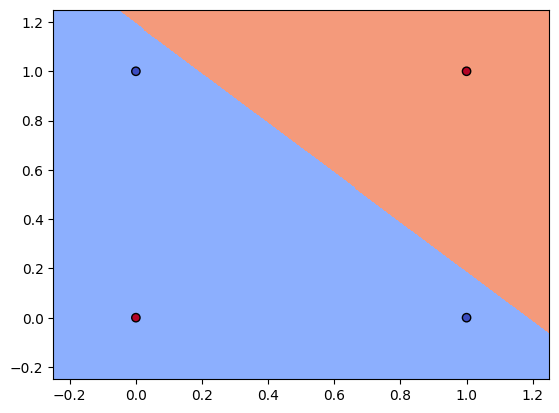

<Figure size 640x480 with 0 Axes>

In [21]:
xx, yy = np.meshgrid(np.linspace(-0.25, 1.25, 300), np.linspace(-0.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()

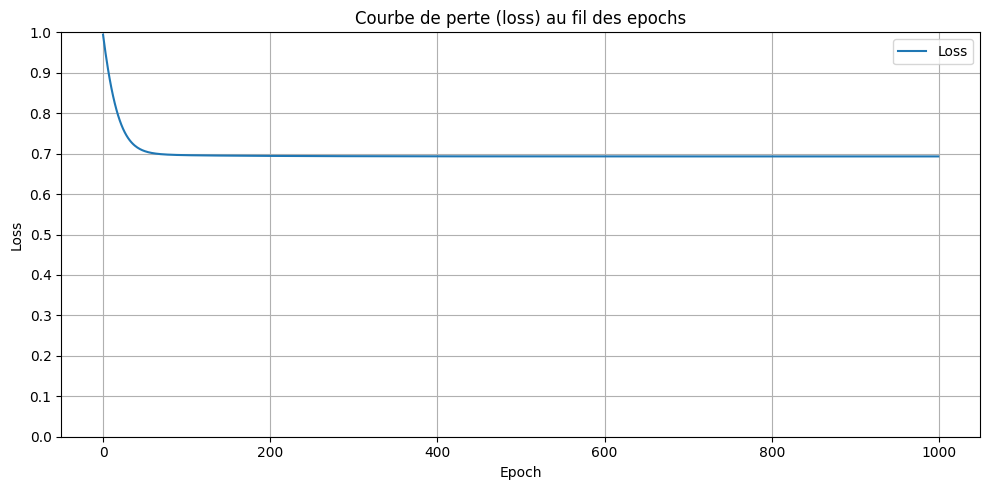

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# MLP

In [23]:
model = pa.MLP([2,2,1])
model.train(X,Y.reshape(-1,1),100000,0.01,True)
Y_pred = [model.predict(x,True)[0] for x in X]

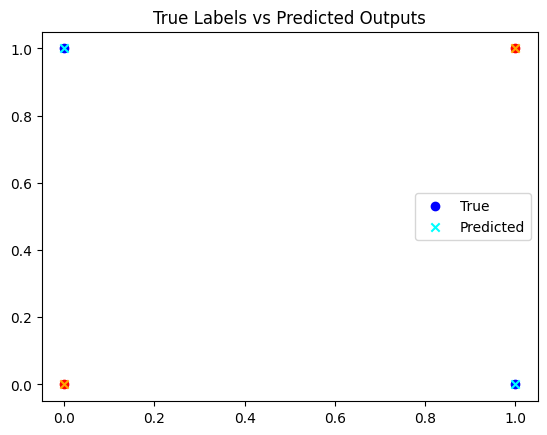

In [24]:
# Plot: Ground Truth
for i, y in enumerate(Y):
    plt.scatter(X[i, 0], X[i, 1], color='blue' if y == 1 else 'red', marker='o', label='True' if i == 0 else "")

# Plot: Predictions
for i, y in enumerate(Y_pred):
    plt.scatter(X[i, 0], X[i, 1], color='cyan' if y > 0 else 'orange', marker='x', label='Predicted' if i == 0 else "")

plt.legend()
plt.title("True Labels vs Predicted Outputs")
plt.show()

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [25]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

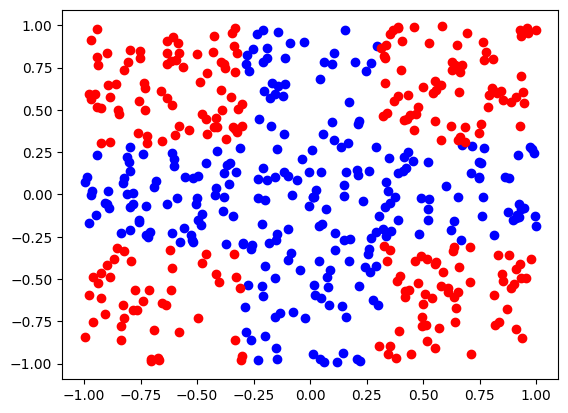

<Figure size 640x480 with 0 Axes>

In [26]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

# Linear Model

In [27]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 0.586


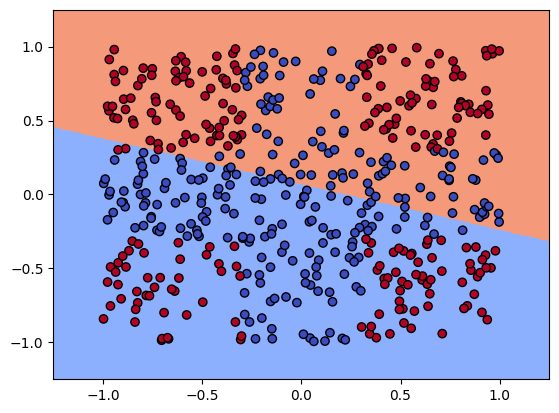

<Figure size 640x480 with 0 Axes>

In [28]:
xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 300), np.linspace(-1.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()

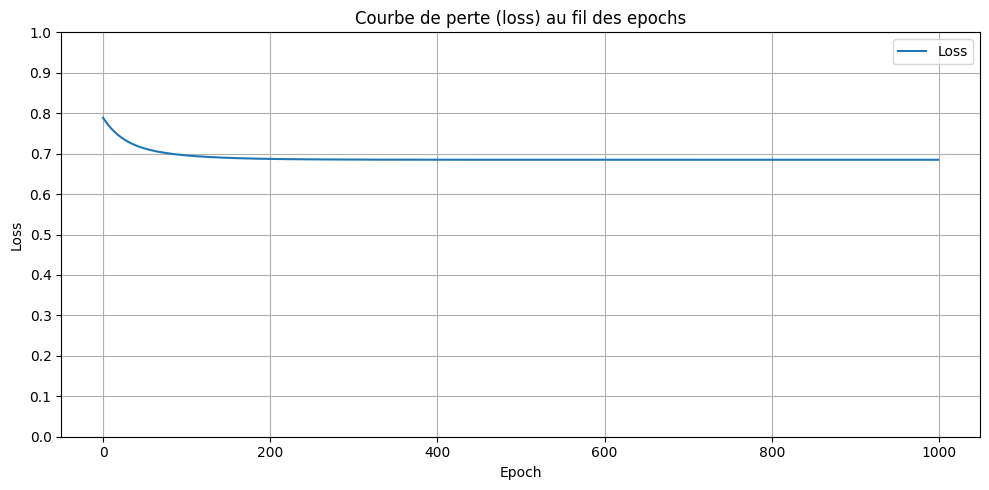

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# MLP

In [30]:
model = pa.MLP([2,4,1])
model.train(X,Y.reshape(-1,1),1_000_000,0.1,True)
Y_pred = [model.predict(x,True)[0] for x in X]

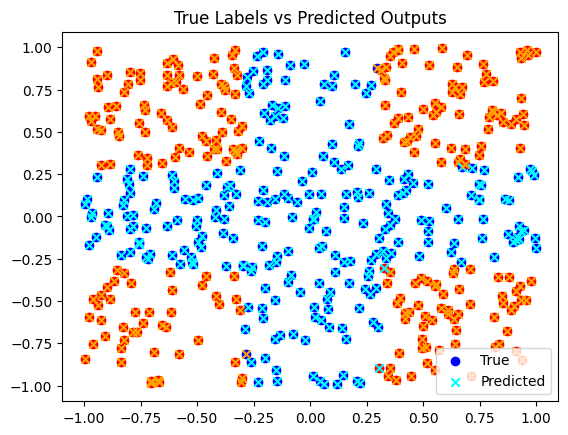

In [31]:
# Plot: Ground Truth
for i, y in enumerate(Y):
    plt.scatter(X[i, 0], X[i, 1], color='blue' if y == 1 else 'red', marker='o', label='True' if i == 0 else "")

# Plot: Predictions
for i, y in enumerate(Y_pred):
    plt.scatter(X[i, 0], X[i, 1], color='cyan' if y > 0 else 'orange', marker='x', label='Predicted' if i == 0 else "")

plt.legend()
plt.title("True Labels vs Predicted Outputs")
plt.show()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [81]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

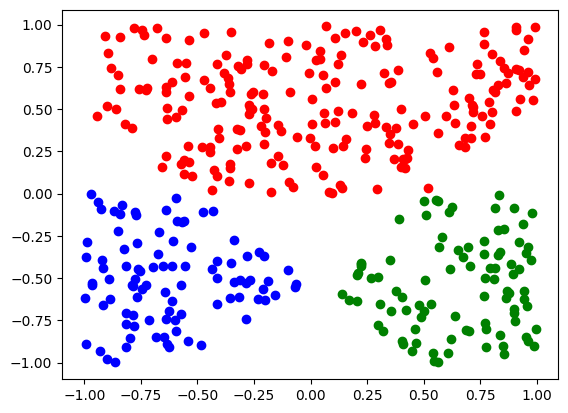

<Figure size 640x480 with 0 Axes>

In [82]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

# Linear Model

In [83]:
models = []

for i in range(3):
    y_i = [row[i] for row in Y]
    y_i = projetannuel.float_labels(y_i)
    model_i = projetannuel.LinearModel(X, y_i)
    model_i.train_classification(epochs=1000, learning_rate=0.1, algo="gradient-descent")
    models.append(model_i)
    
Y_pred = []
for x in X:
    Y_pred.append([model.predict(x) for model in models])

Y = [list(y) for y in Y]     
print(f"Accuracy score : {projetannuel.accuracy_score(Y, Y_pred)}")

Accuracy score : 0.9775


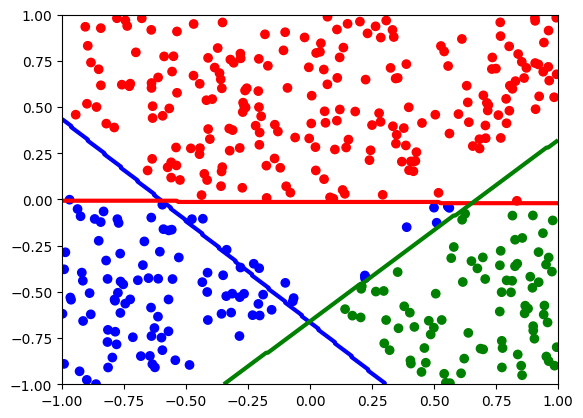

<Figure size 640x480 with 0 Axes>

In [84]:
colors_pred = ["blue", "red", "green"]

plt.scatter(np.array(X)[:,0], np.array(X)[:,1], 
            c=[colors_pred[np.argmax(y)] for y in Y_pred])

xx, yy = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

colors_boundary = ["blue", "red", "green"]

for idx, model in enumerate(models):
    Z = np.array([float(model.predict(list(p))) for p in grid])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0.5], colors=[colors_boundary[idx]], linewidths=3)

plt.show()
plt.clf()

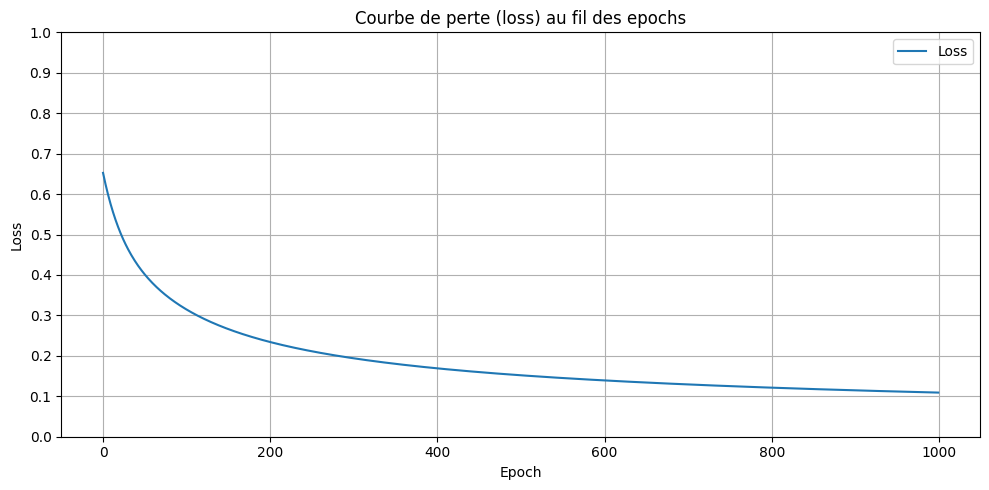

In [85]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# MLP

In [88]:
Y

[[np.int64(0), np.int64(1), np.int64(0)],
 [np.int64(0), np.int64(0), np.int64(1)],
 [np.int64(0), np.int64(0), np.int64(1)],
 [np.int64(0), np.int64(0), np.int64(1)],
 [np.int64(0), np.int64(1), np.int64(0)],
 [np.int64(0), np.int64(1), np.int64(0)],
 [np.int64(1), np.int64(0), np.int64(0)],
 [np.int64(1), np.int64(0), np.int64(0)],
 [np.int64(0), np.int64(1), np.int64(0)],
 [np.int64(0), np.int64(1), np.int64(0)],
 [np.int64(1), np.int64(0), np.int64(0)],
 [np.int64(1), np.int64(0), np.int64(0)],
 [np.int64(1), np.int64(0), np.int64(0)],
 [np.int64(0), np.int64(0), np.int64(1)],
 [np.int64(0), np.int64(1), np.int64(0)],
 [np.int64(0), np.int64(1), np.int64(0)],
 [np.int64(0), np.int64(0), np.int64(1)],
 [np.int64(0), np.int64(0), np.int64(1)],
 [np.int64(0), np.int64(0), np.int64(1)],
 [np.int64(1), np.int64(0), np.int64(0)],
 [np.int64(0), np.int64(1), np.int64(0)],
 [np.int64(1), np.int64(0), np.int64(0)],
 [np.int64(1), np.int64(0), np.int64(0)],
 [np.int64(0), np.int64(0), np.int

In [86]:
model = pa.MLP([2,3])
model.train(X,Y,1000000,0.01,True)
Y_pred = [model.predict(x,True) for x in X]
Y = [list(y) for y in Y]     
print(f"Accuracy score : {pa.accuracy_score(Y, Y_pred)}")

Accuracy score : 0.975


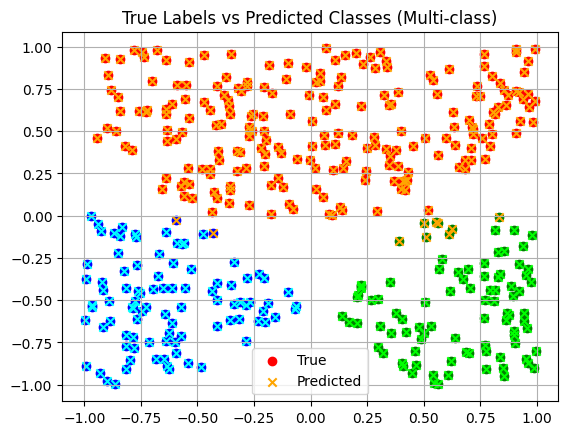

<Figure size 640x480 with 0 Axes>

In [87]:
# Predicted class indices
predicted_classes = [np.argmax(y) for y in Y_pred]
# True class indices (assuming one-hot encoded Y)
true_classes = [np.argmax(y) for y in Y]

# Plot: True Labels
for i, y in enumerate(true_classes):
    plt.scatter(X[i, 0], X[i, 1],
                color='blue' if y == 0 else 'red' if y == 1 else 'green',
                marker='o',
                label='True' if i == 0 else "")

# Plot: Predicted Labels
for i, y in enumerate(predicted_classes):
    plt.scatter(X[i, 0], X[i, 1],
                color='cyan' if y == 0 else 'orange' if y == 1 else 'lime',
                marker='x',
                label='Predicted' if i == 0 else "")

plt.legend()
plt.title("True Labels vs Predicted Classes (Multi-class)")
plt.grid(True)
plt.show()
plt.clf()


### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [78]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

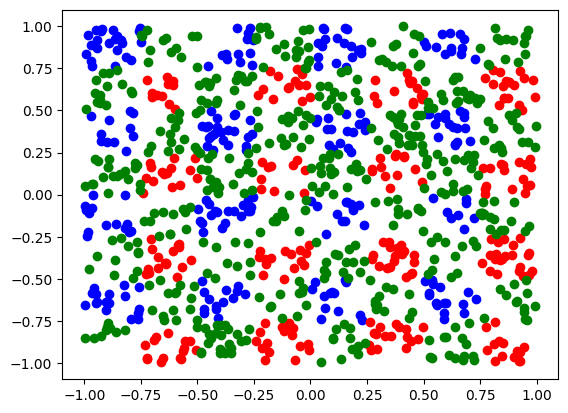

<Figure size 640x480 with 0 Axes>

In [79]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

# Linear Model

In [41]:
models = []

for i in range(3):
    y_i = [row[i] for row in Y]
    y_i = projetannuel.float_labels(y_i)
    model_i = projetannuel.LinearModel(X, y_i)
    model_i.train_classification(epochs=1000, learning_rate=0.1, algo="gradient-descent")
    models.append(model_i)
    
Y_pred = []
for x in X:
    Y_pred.append([model.predict(x) for model in models])

Y_format = [list(y) for y in Y]     
print(projetannuel.accuracy_score(Y_format, Y_pred))

0.514


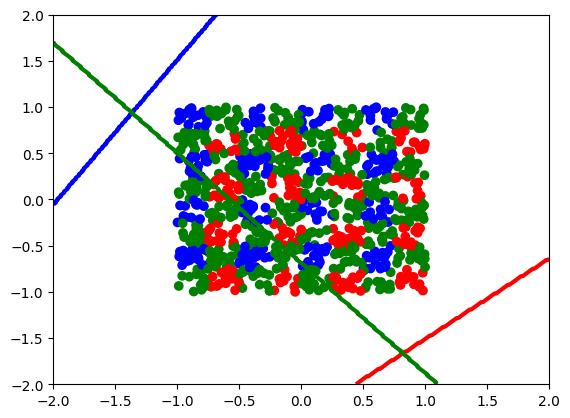

<Figure size 640x480 with 0 Axes>

In [42]:
colors_pred = ["blue", "red", "green"]

plt.scatter(np.array(X)[:,0], np.array(X)[:,1], 
            c=[colors_pred[np.argmax(y)] for y in Y])

xx, yy = np.meshgrid(np.linspace(-2, 2, 300), np.linspace(-2, 2, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

colors_boundary = ["blue", "red", "green"]

for idx, model in enumerate(models):
    Z = np.array([float(model.predict(list(p))) for p in grid])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0.5], colors=[colors_boundary[idx]], linewidths=3)

plt.show()
plt.clf()

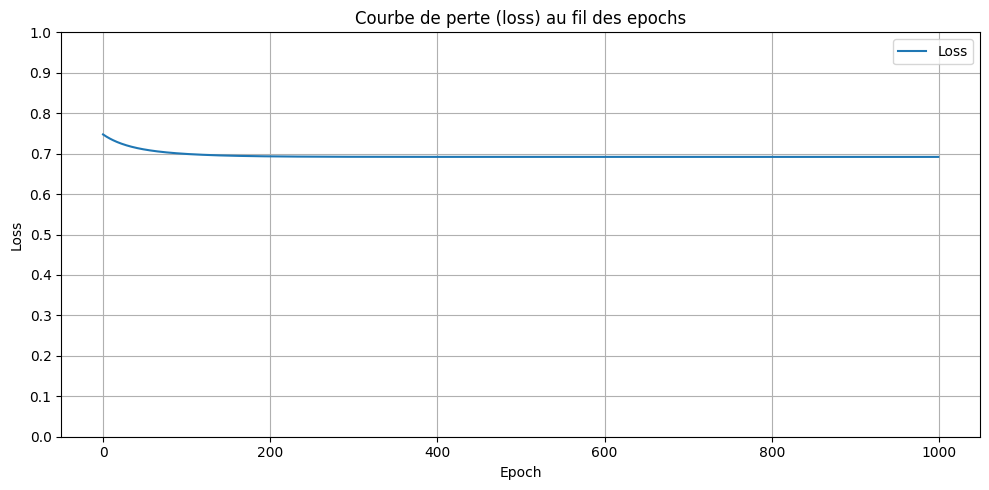

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# MLP

In [44]:
param_grid = {
    "hidden_layer_1": [4, 8, 16, 32],
    "hidden_layer_2": [4, 8, 16, 32],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "epochs": [10000, 50000, 100000],
}

In [45]:
# import itertools

# best_score = 0.0
# best_params = None

# for h1, h2, lr, ep in itertools.product(
#     param_grid["hidden_layer_1"],
#     param_grid["hidden_layer_2"],
#     param_grid["learning_rate"],
#     param_grid["epochs"]
# ):
#     model = pa.MLP([2, h1, h2, 3])
#     model.train(X, Y, ep, lr, True)
#     Y_pred = [model.predict(x, True) for x in X]
#     Y_pred = np.argmax(Y_pred, axis=1).tolist()
#     Y_train = np.argmax(Y, axis=1).tolist()
#     acc = pa.accuracy_score(Y_train, Y_pred)
    
#     print(f"Tested: h1={h1}, h2={h2}, lr={lr}, epochs={ep}, acc={acc:.4f}")
    
#     if acc > best_score:
#         best_score = acc
#         best_params = (h1, h2, lr, ep)

In [46]:
#meilleur modele de la grille
model = pa.MLP([2, 16, 16, 3])
model.train(X,Y,100000,0.05,True)
Y_pred =[model.predict(x,True) for x in X]
Y = [list(y) for y in Y]     
print(f"Accuracy score : {pa.accuracy_score(Y, Y_pred)}")

Accuracy score : 0.547


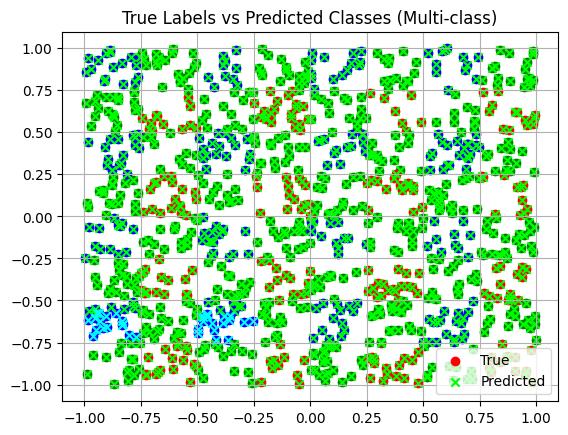

<Figure size 640x480 with 0 Axes>

In [47]:
# Predicted class indices
predicted_classes = [np.argmax(y) for y in Y_pred]
# True class indices (assuming one-hot encoded Y)
true_classes = [np.argmax(y) for y in Y]

# Plot: True Labels
for i, y in enumerate(true_classes):
    plt.scatter(X[i, 0], X[i, 1],
                color='blue' if y == 0 else 'red' if y == 1 else 'green',
                marker='o',
                label='True' if i == 0 else "")

# Plot: Predicted Labels
for i, y in enumerate(predicted_classes):
    plt.scatter(X[i, 0], X[i, 1],
                color='cyan' if y == 0 else 'orange' if y == 1 else 'lime',
                marker='x',
                label='Predicted' if i == 0 else "")

plt.legend()
plt.title("True Labels vs Predicted Classes (Multi-class)")
plt.grid(True)
plt.show()
plt.clf()


## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [48]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      10,
      5
])

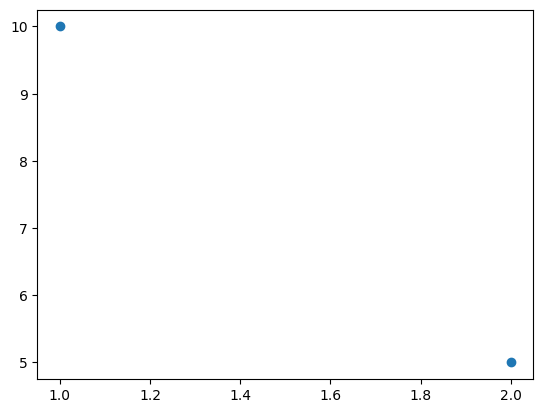

<Figure size 640x480 with 0 Axes>

In [49]:
plt.scatter(X,Y)
plt.show()
plt.clf()

# Linear Model

In [50]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 5.048709793414476e-29
RMSE : 7.105427357601002e-15


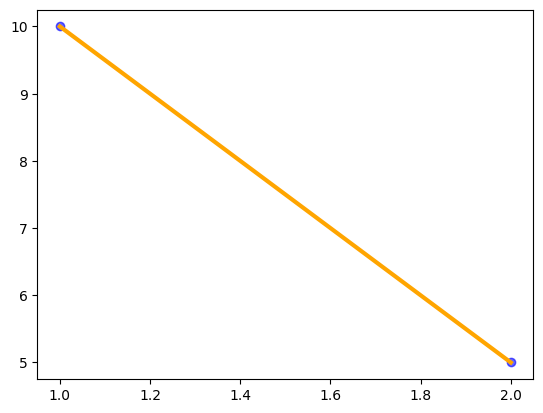

<Figure size 640x480 with 0 Axes>

In [51]:
plt.scatter(X, Y, color='blue', alpha=0.6)

x1 = np.linspace(min(X), max(X), 300)
x1_reshaped = x1.reshape(-1, 1)

y_pred = np.array([model.predict(list(p)) for p in x1_reshaped])

plt.plot(x1, y_pred, c='orange', lw=3)

plt.show()
plt.clf()

# MLP

In [52]:
modele = pa.MLP([1,1])
modele.train(X,Y.reshape(-1,1),1000,0.1,False)
Y_pred = [modele.predict(x,False)[0] for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 9.590424915460946e-06
RMSE : 0.0030968411188598208


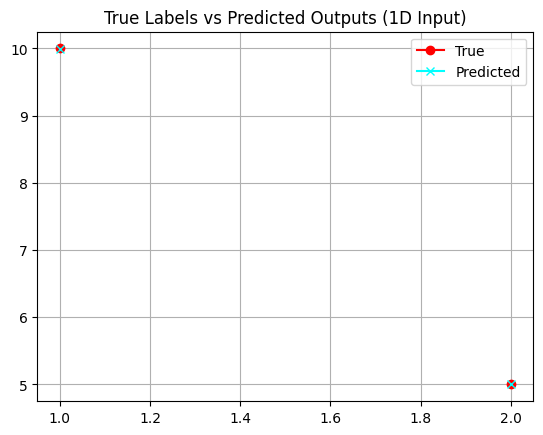

In [53]:
for i, y in enumerate(Y):
    plt.plot(X[i][0], y, c="red", marker="o", label="True" if i == 0 else "")

for i, y in enumerate(Y_pred):
    plt.plot(X[i][0], y, c="cyan", marker="x", label="Predicted" if i == 0 else "") 

plt.legend()
plt.title("True Labels vs Predicted Outputs (1D Input)")
plt.grid(True)
plt.show()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [54]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

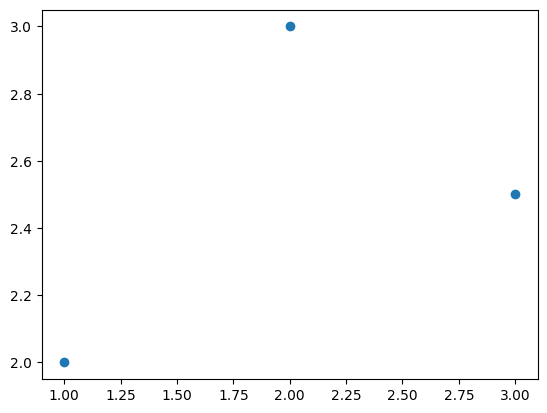

<Figure size 640x480 with 0 Axes>

In [55]:
plt.scatter(X,Y)
plt.show()
plt.clf()

# Linear Model

In [56]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 0.12500000000000008
RMSE : 0.3535533905932739


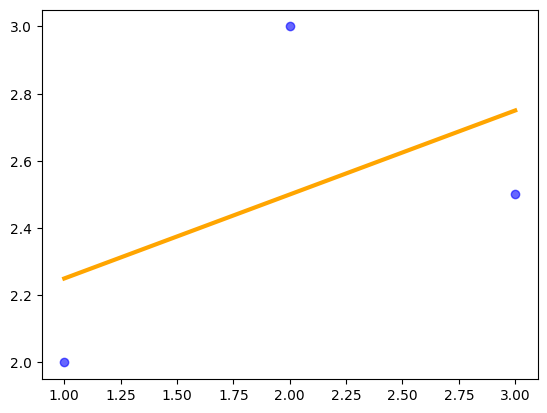

<Figure size 640x480 with 0 Axes>

In [57]:
plt.scatter(X, Y, color='blue', alpha=0.6)

x1 = np.linspace(min(X), max(X), 300)
x1_reshaped = x1.reshape(-1, 1)

y_pred = np.array([model.predict(list(p)) for p in x1_reshaped])

plt.plot(x1, y_pred, c='orange', lw=3)

plt.show()
plt.clf()

# MLP

In [58]:
modele = pa.MLP([1,3,1])
modele.train(X,Y.reshape(-1,1),10000,0.1,False)
Y_pred = [modele.predict(x,False)[0] for x in X]
print(f"MSE : {pa.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {pa.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 6.738186898762809e-31
RMSE : 8.208645989907719e-16


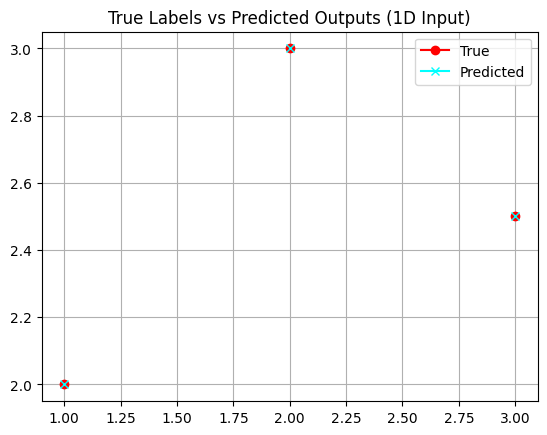

In [59]:
for i, y in enumerate(Y):
    plt.plot(X[i][0], y, c="red", marker="o", label="True" if i == 0 else "")

for i, y in enumerate(Y_pred):
    plt.plot(X[i][0], y, c="cyan", marker="x", label="Predicted" if i == 0 else "") 

plt.legend()
plt.title("True Labels vs Predicted Outputs (1D Input)")
plt.grid(True)
plt.show()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [60]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

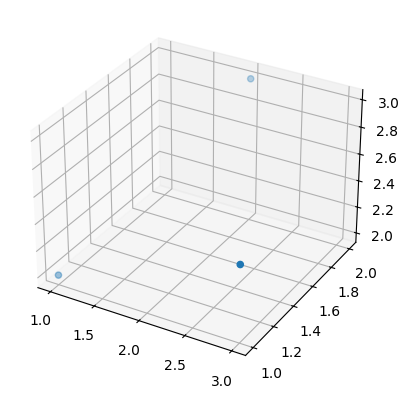

<Figure size 640x480 with 0 Axes>

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# Linear Model

In [62]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 4.2729965699471475e-30
RMSE : 2.0671227757313177e-15


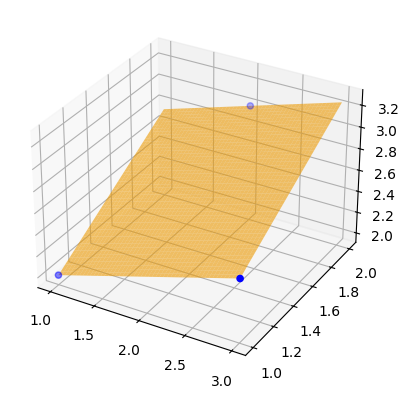

<Figure size 640x480 with 0 Axes>

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)

grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = np.array([model.predict(list(p)) for p in grid_points])
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6)

plt.show()
plt.clf()

# MLP

In [64]:
modele = pa.MLP([2,1])
modele.train(X,Y.reshape(-1,1),10000,0.1,False)
Y_pred = [modele.predict(x,False)[0] for x in X]
print(f"MSE : {pa.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {pa.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 6.573840876841765e-32
RMSE : 2.5639502485114184e-16


### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [65]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

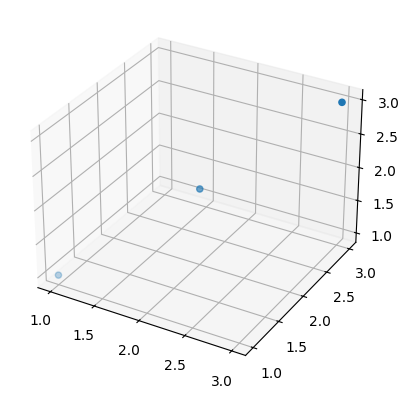

<Figure size 640x480 with 0 Axes>

In [66]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# Linear Model

In [67]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 5.482994156340834e-29
RMSE : 7.404724273287179e-15


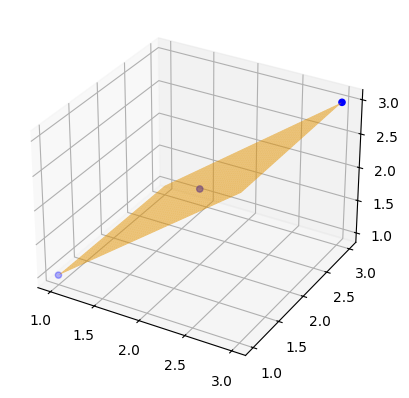

<Figure size 640x480 with 0 Axes>

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)

grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = np.array([model.predict(list(p)) for p in grid_points])
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6)

plt.show()
plt.clf()

# MLP

In [69]:
modele = pa.MLP([2,1])
modele.train(X,Y.reshape(-1,1),10000,0.1,False)
Y_pred = [modele.predict(x,False)[0] for x in X]
print(f"MSE : {pa.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {pa.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 0.0
RMSE : 0.0


In [70]:
print(Y_pred)

[1.0, 2.0, 3.0]


### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [71]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

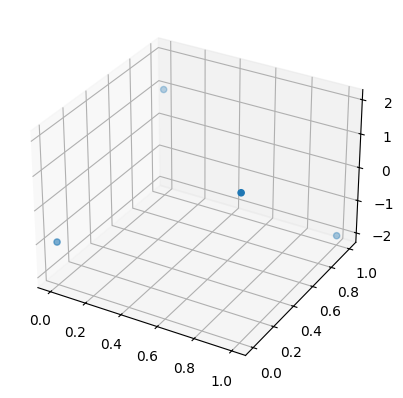

<Figure size 640x480 with 0 Axes>

In [72]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# Linear Model

In [73]:
y = projetannuel.float_labels(Y)

model = projetannuel.LinearModel(
    X,
    y
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 2.25
RMSE : 1.5


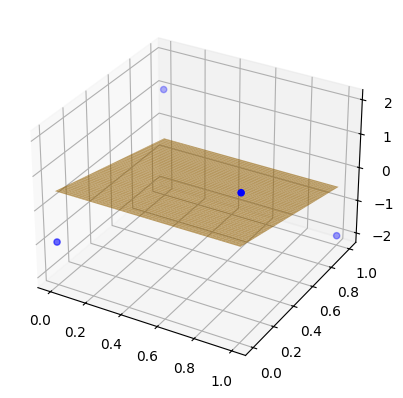

<Figure size 640x480 with 0 Axes>

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)

grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = np.array([model.predict(list(p)) for p in grid_points])
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6)

plt.show()
plt.clf()

# MLP

In [75]:
modele = pa.MLP([2,2,1])
modele.train(X,Y.reshape(-1,1),10000,0.1,False)
Y_pred = [modele.predict(x,False)[0] for x in X]
print(f"MSE : {pa.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {pa.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 0.513901027538715
RMSE : 0.7168689054065011


In [76]:
print(Y_pred)

[2.01254389737166, -0.15221431711156086, -1.9917687492400025, -0.14689908290539577]
